# Praca domowa 6
## Michał Wdowski


Najpierw zaimportujmy dane i przyjrzyjmy się im

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("../../clustering_R3.csv", header = 0)
data.head()

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814


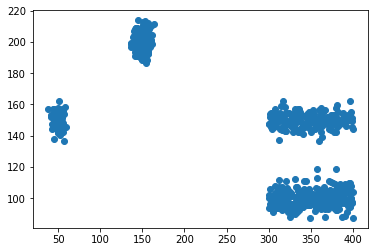

In [3]:
plt.scatter(data["X1"], data["X2"])

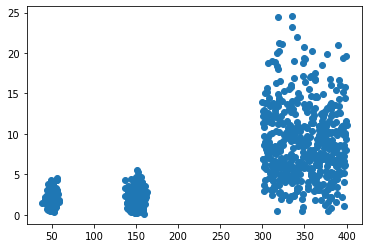

In [4]:
plt.scatter(data["X1"], data["X3"])

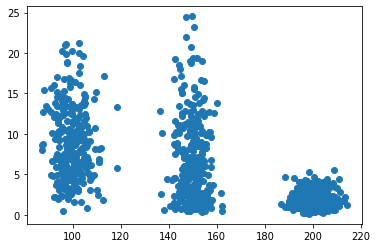

In [5]:
plt.scatter(data["X2"], data["X3"])

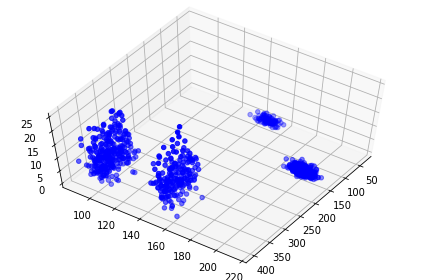

In [6]:
from mpl_toolkits import mplot3d

def plot_results(data, labels = 'blue'):
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    ax.scatter3D(data["X1"], data["X2"], data["X3"], c = labels)
    ax.view_init(60, 35)
    
    plt.tight_layout()

    plt.show()
    
plot_results(data)

Na oko powinny być 4 klastry o znacząco różnych rozrzutach.

Warto jednak dodatkowo znormalizować dane:

In [7]:
from sklearn import preprocessing

x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)


In [8]:
data.columns = ["X1", "X2", "X3"]
data.head()

,X1,X2,X3
0,0.314214,0.873502,0.039760
1,0.296070,0.906832,0.107066
2,0.323520,0.875180,0.021112
3,0.309541,0.943819,0.022997
4,0.308086,0.932828,0.140531


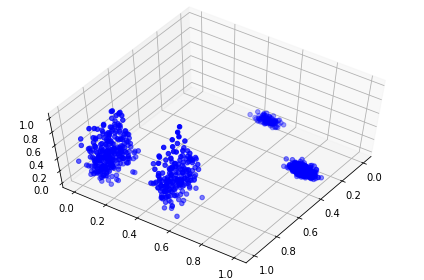

In [9]:
plot_results(data)

Wykorzystam dwie metryki: silhouette i indeks Daviesa-Bouldina.

## k-means

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

### Silhouette score

Silhouette sprawdza jak "podobny" jest każdy punkt do swojego klastra. Wynik będzie pochodzić z przedziału $(-1, 1)$, a im więcej, tym lepiej.

In [24]:
kmeans = KMeans(n_clusters = 4, random_state = 2137)
kmeans.fit(data)
labels = kmeans.predict(data)

sil_scores = silhouette_score(data, labels)
sil_scores

0.6643641692874769

Tyle wynosi wynik silhouette dla kmeans. Przyporządkowanie klastrów wygląda następująco:

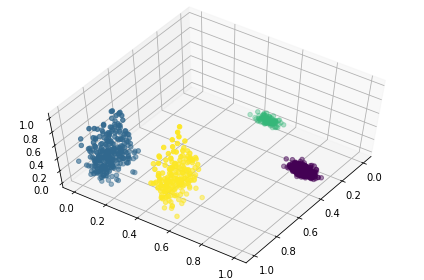

In [25]:
plot_results(data, labels)

### Davies-Bouldin score

Ten indeks liczy stosunek między odległościami wewnątrz klastra a odległościami spoza klastra, daje wynik z przedziału (0, 1) - im **mniej** tym lepiej.

In [37]:
db_scores = davies_bouldin_score(data, labels)
db_scores

0.607814385262746

## GMM

In [28]:
from sklearn.mixture import GaussianMixture

### Silhouette

In [35]:
gmm = GaussianMixture(n_components = 4)
gmm.fit(data)
labels = gmm.predict(data)

sil_scores = silhouette_score(data, labels)    
sil_scores

0.6643641692874769

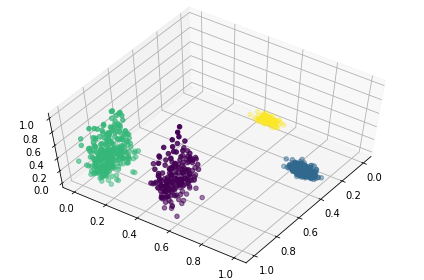

In [36]:
plot_results(data, labels)

Sytuacja jest identyczna jak w k-means, nawet wynik wyszedł taki sam.

### Davies-Bouldin score

In [38]:
db_scores = davies_bouldin_score(data, labels)
db_scores

0.607814385262746

Tu też wyszło tak samo, więc wygląda na to, że oba algorytmy osiągnęły dokładnie taki sam podział, więc zarówno kmeans liczący odległości od centroidów, jak i gmm używający rozkładów normalnych doszły do tego samego. jednak patrząc na dane z zadania, trzeba przyznać, że każdy inny podział (poza kilkoma punktami między dwoma większymi klastrami) byłby po prostu niepoprawny.

### Oświadczenie

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu "Wstęp do Uczenia Maszynowego" została wykonana przeze mnie samodzielnie.

Michał Wdowski, 298848